In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


For the robot to reconstruct the state of the game:

1. take picture of the board (robot.take_picture('board.jpg'))
2. slice the image into subimages - how many sub images?  num rows x num cols
3. for each sub image --> interpret the image piece #1, piece #2, or empty. 
   need to classify the sub image into a category
4. make an empty state with num row, num cols.  go through each square, 
    recognize the piece from the subimage, 
    then assign state[square]=category we detected
5.  goal  e.g. state = [ 0 0 0 ; 0 1 0 ; 2 1 0]

In [2]:
x1=rand(10)

In [3]:
x1

array([0.22133683, 0.55412025, 0.83008514, 0.03610755, 0.43471596,
       0.97163358, 0.15873859, 0.29836241, 0.17616496, 0.53493471])

In [4]:
x1.shape

(10,)

In [5]:
x2=rand(3,5)

In [6]:
x2

array([[0.23333296, 0.81752412, 0.03447073, 0.53676828, 0.60447038],
       [0.99040033, 0.403155  , 0.35652925, 0.98769558, 0.93253556],
       [0.61074351, 0.87370154, 0.03035011, 0.95468939, 0.17137662]])

In [7]:
x2[0,1]

0.8175241215998371

In [8]:
x2[0,1:4]

array([0.81752412, 0.03447073, 0.53676828])

In [9]:
list(range(1,4))

[1, 2, 3]

In [11]:
x2[1:3,1:4]

array([[0.403155  , 0.35652925, 0.98769558],
       [0.87370154, 0.03035011, 0.95468939]])

In [14]:
x2.shape

(3, 5)

In [15]:
x1

array([0.87444574, 0.77896893, 0.30358988, 0.46975808, 0.75463044,
       0.03466734, 0.45264157, 0.41606452, 0.66931302, 0.15099122])

In [19]:
x1[2:8],x1[8:]

(array([0.30358988, 0.46975808, 0.75463044, 0.03466734, 0.45264157,
        0.41606452]), array([0.66931302, 0.15099122]))

In [20]:
x1[2:]

array([0.30358988, 0.46975808, 0.75463044, 0.03466734, 0.45264157,
       0.41606452, 0.66931302, 0.15099122])

In [21]:
x1[:5]

array([0.87444574, 0.77896893, 0.30358988, 0.46975808, 0.75463044])

In [22]:
x2

array([[0.28653604, 0.70592883, 0.6694164 , 0.90112546, 0.47948551],
       [0.98139603, 0.81264924, 0.18358427, 0.04094265, 0.4003662 ],
       [0.66116602, 0.27018684, 0.58657376, 0.17468201, 0.25570486]])

In [24]:
x2[1:5]

array([[0.98139603, 0.81264924, 0.18358427, 0.04094265, 0.4003662 ],
       [0.66116602, 0.27018684, 0.58657376, 0.17468201, 0.25570486]])

In [25]:
x2[1:5].shape

(2, 5)

In [29]:
x2

array([[0.28653604, 0.70592883, 0.6694164 , 0.90112546, 0.47948551],
       [0.98139603, 0.81264924, 0.18358427, 0.04094265, 0.4003662 ],
       [0.66116602, 0.27018684, 0.58657376, 0.17468201, 0.25570486]])

In [27]:
x2[0:1,2:4]

array([[0.6694164 , 0.90112546]])

In [30]:
x2[0,2:4]

array([0.6694164 , 0.90112546])

In [28]:
x2[0:2,2:4]

array([[0.6694164 , 0.90112546],
       [0.18358427, 0.04094265]])

In [31]:
x2

array([[0.28653604, 0.70592883, 0.6694164 , 0.90112546, 0.47948551],
       [0.98139603, 0.81264924, 0.18358427, 0.04094265, 0.4003662 ],
       [0.66116602, 0.27018684, 0.58657376, 0.17468201, 0.25570486]])

In [32]:
x2[:,3]

array([0.90112546, 0.04094265, 0.17468201])

In [33]:
x2[1,:]

array([0.98139603, 0.81264924, 0.18358427, 0.04094265, 0.4003662 ])

In [37]:
x3=rand(5,4,3)
x3.shape

(5, 4, 3)

In [38]:
x3

array([[[0.90416097, 0.41049031, 0.3453434 ],
        [0.92740135, 0.97224754, 0.24879575],
        [0.34812139, 0.666245  , 0.57683586],
        [0.46155809, 0.38671477, 0.2374722 ]],

       [[0.77516908, 0.3105744 , 0.87719927],
        [0.2420963 , 0.07176445, 0.29675826],
        [0.40614786, 0.21513565, 0.7430543 ],
        [0.29543817, 0.36160944, 0.52504167]],

       [[0.80265652, 0.91074484, 0.76266409],
        [0.37811945, 0.18511715, 0.35778712],
        [0.54177935, 0.28208791, 0.51782159],
        [0.54935124, 0.47186489, 0.41039071]],

       [[0.95434246, 0.98474363, 0.96436697],
        [0.40375258, 0.88947492, 0.14794369],
        [0.56506803, 0.96243168, 0.64577059],
        [0.04159016, 0.59203844, 0.29854722]],

       [[0.2108023 , 0.14274836, 0.30913443],
        [0.14773556, 0.44372952, 0.17209186],
        [0.62852747, 0.5944368 , 0.38467021],
        [0.10043169, 0.52899415, 0.25194224]]])

In [39]:
x5=rand(5,4,3,4,3)

In [40]:
x5

array([[[[[0.50608602, 0.51538205, 0.94027664],
          [0.47294837, 0.8637214 , 0.95586133],
          [0.61467699, 0.42587475, 0.83417473],
          [0.47285092, 0.61914421, 0.35596928]],

         [[0.51845906, 0.893936  , 0.50144338],
          [0.50434652, 0.82371369, 0.1877225 ],
          [0.03326681, 0.06281208, 0.59602662],
          [0.66519987, 0.60221521, 0.74639777]],

         [[0.16759048, 0.70834969, 0.43146539],
          [0.99563001, 0.18506509, 0.47095209],
          [0.99789075, 0.12362048, 0.78398101],
          [0.96246887, 0.08215014, 0.63787888]]],


        [[[0.37833965, 0.96280671, 0.46969387],
          [0.6526932 , 0.08094356, 0.88511863],
          [0.75344985, 0.64414824, 0.52506197],
          [0.55147803, 0.60377831, 0.65235278]],

         [[0.93534978, 0.62893499, 0.32312202],
          [0.64765145, 0.18818649, 0.57486168],
          [0.63902812, 0.5018499 , 0.2422892 ],
          [0.06117348, 0.14146042, 0.07180146]],

         [[0.64768857, 0.035

In [41]:
x3

array([[[0.90416097, 0.41049031, 0.3453434 ],
        [0.92740135, 0.97224754, 0.24879575],
        [0.34812139, 0.666245  , 0.57683586],
        [0.46155809, 0.38671477, 0.2374722 ]],

       [[0.77516908, 0.3105744 , 0.87719927],
        [0.2420963 , 0.07176445, 0.29675826],
        [0.40614786, 0.21513565, 0.7430543 ],
        [0.29543817, 0.36160944, 0.52504167]],

       [[0.80265652, 0.91074484, 0.76266409],
        [0.37811945, 0.18511715, 0.35778712],
        [0.54177935, 0.28208791, 0.51782159],
        [0.54935124, 0.47186489, 0.41039071]],

       [[0.95434246, 0.98474363, 0.96436697],
        [0.40375258, 0.88947492, 0.14794369],
        [0.56506803, 0.96243168, 0.64577059],
        [0.04159016, 0.59203844, 0.29854722]],

       [[0.2108023 , 0.14274836, 0.30913443],
        [0.14773556, 0.44372952, 0.17209186],
        [0.62852747, 0.5944368 , 0.38467021],
        [0.10043169, 0.52899415, 0.25194224]]])

In [42]:
x3[:,:,0]

array([[0.90416097, 0.92740135, 0.34812139, 0.46155809],
       [0.77516908, 0.2420963 , 0.40614786, 0.29543817],
       [0.80265652, 0.37811945, 0.54177935, 0.54935124],
       [0.95434246, 0.40375258, 0.56506803, 0.04159016],
       [0.2108023 , 0.14773556, 0.62852747, 0.10043169]])

In [43]:
x3[:,:,0].shape

(5, 4)

In [12]:
im=imread('images/dogs.jpg')

In [13]:
im.shape

(1098, 1242, 3)

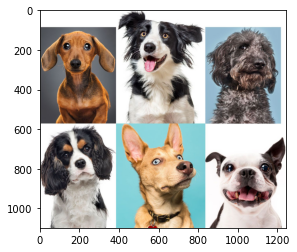

In [14]:
imshow(im)

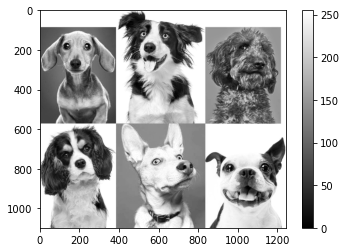

In [5]:
imshow(im[:,:,0],cmap=cm.gray)
colorbar()

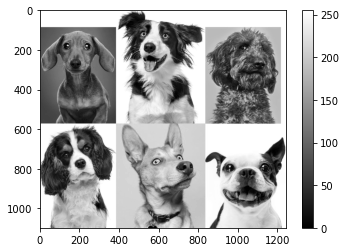

In [74]:
imshow(im[:,:,1],cmap=cm.gray)
colorbar()

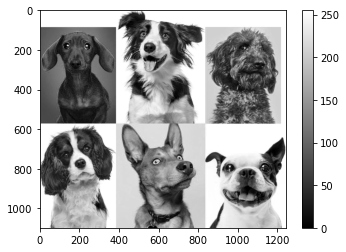

In [75]:
imshow(im[:,:,2],cmap=cm.gray)
colorbar()

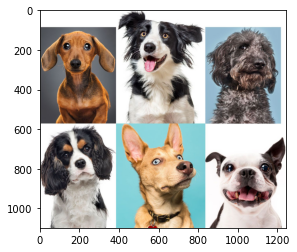

In [76]:
imshow(im)

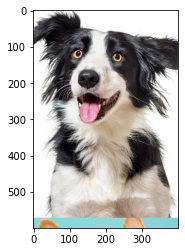

In [15]:
subimage=im[0:600,400:800,:]
imshow(subimage)

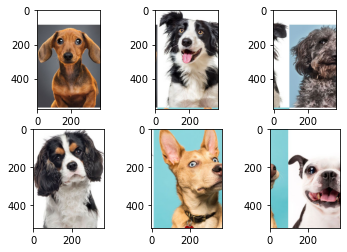

In [16]:
count=1
width=370
height=580

offset_x=0
offset_y=0

for row in range(2):
    for col in range(3):
        
        start_col=col*width+offset_x
        end_col=(col+1)*width+offset_y
        
        start_row=row*height
        end_row=(row+1)*height
        
        subimage=im[start_row:end_row,start_col:end_col,:]
        
        subplot(2,3,count)
        imshow(subimage)
        
        
        count+=1

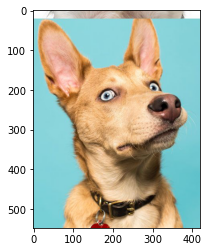

In [6]:
subimage = im[550:,400:820,:]
imshow(subimage)

In [80]:
imsave('images/onedog.jpg',subimage)

In [62]:
im=imread('images/dogs2.png')

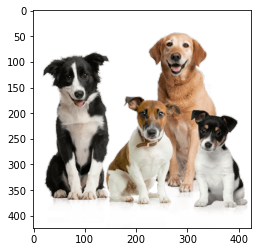

In [57]:
imshow(im)

In [58]:
im.shape

(424, 425, 4)

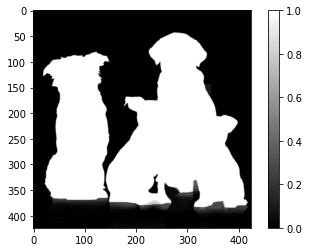

In [59]:
imshow(im[:,:,3],cmap=cm.gray)
colorbar()

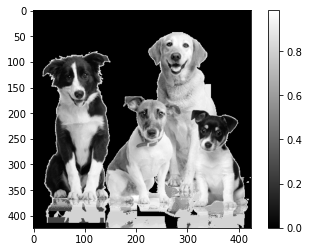

In [60]:
imshow(im[:,:,0],cmap=cm.gray)
colorbar()